In [1]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision import datasets, transforms
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.en_conv = nn.Sequential(
            nn.Conv2d(1, 16, 4, 2, 1),
            nn.BatchNorm2d(16),
            nn.Tanh(),
            
            nn.Conv2d(16, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.Tanh(),
            
            nn.Conv2d(32, 16, 3, 1, 1),
            nn.BatchNorm2d(16),
            nn.Tanh()
        )
        self.en_fc = nn.Linear(16*7*7, 10)
        self.de_fc = nn.Linear(10, 16*7*7)
        self.de_conv = nn.Sequential(
            nn.ConvTranspose2d(16, 16, 4, 2, 1),
            nn.BatchNorm2d(16),
            nn.Tanh(),
            nn.ConvTranspose2d(16, 1, 4, 2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        en = self.en_conv(x)
        code = self.en_fc(en.view(en.size(0), -1))
        de = self.de_fc(code)
        decoded = self.de_conv(de.view(de.size(0), 16, 7, 7))
        return code, decoded

In [3]:
dataset = datasets.MNIST(root='F:\\大三下课程\\深度学习\\第六次作业\\MNIST',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=False)

train_loader = torch.utils.data.DataLoader(dataset,batch_size=1,shuffle=False)

auto_encoder = AutoEncoder()
auto_encoder.load_state_dict(torch.load('params'))

In [4]:
i=0
imgsss=[]
for img, l in train_loader:
    imgsss.append(img)
    
def search_img(idx, topN=10):
    num = 0
    imgs = []
    score = []
    
    for img in imgsss:
        code, _ = auto_encoder(img)
        code = code.to(torch.uint8).numpy()
        img = img.reshape(-1) * 1.
        imgs.append(img)
        num += 1
        if num % 1000 == 0:
            print(num)
        
    tar = imgs[idx]
    
    for i in range(num):
        score.append(sum(imgs[i] * tar).item())
    
    score = np.array(score)
    score = np.argsort(-score)
    return score[:10]

In [8]:
idx = 2
num = 10
gain = search_img(idx, topN=num)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000


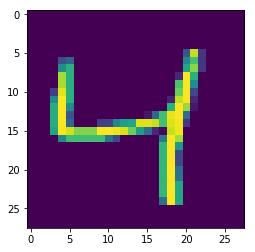

In [9]:
# 可视化原图
target = imgsss[idx]*255.
plt.imshow(target.view([28, 28]).to(torch.uint8).numpy())

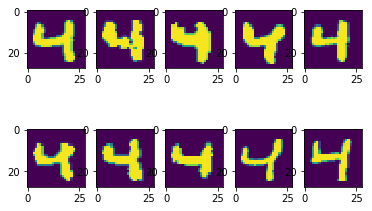

In [10]:
# 可视化搜索结果
for i in range(num):
    plt.subplot(2, 5, i+1)
    plt.imshow(((imgsss[gain[i]])*255.).view([28, 28]).to(torch.uint8).numpy())